# EDA Q1: Does the distance between a house and downtown Seattle affect house price?

* **sqft_livingsquare** -  footage of the home
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 1. Import Cleaned Data

In [176]:
data = pd.read_csv('csv_files/added_features_data.csv',index_col=0)
dummy_data = pd.read_csv('csv_files/preprocessed_dummy_data.csv',index_col=0)

final_data = pd.concat([data,dummy_data],axis=1)

In [178]:
# dataframe for latitude and longitude for each house, and price
df_house_location = final_data[['price','lat','long','city']]

df_house_location.head()

,price,lat,long,city
0,538000.0,47.7210,-122.319,Seattle
1,571000.0,47.7168,-122.287,Seattle
2,315000.0,47.7264,-122.310,Seattle
3,382500.0,47.7135,-122.287,Seattle
4,425000.0,47.7222,-122.320,Seattle


## 2. Remove Outliers

In [179]:
df_house_location = df_house_location[df_house_location['price'] <= 2000000]

## 3. Calculate Distance Between House and Downtown Seattle

In [180]:
from haversine import haversine, Unit

In [181]:
# latitude and longitude of downtown seattle
downtown_seattle_location = (47.608013, -122.335167)

# latitude and longitude of each house in the cleaned dataset
house_location = list(zip(df_house_location['lat'],df_house_location['long']))

# calculate distance in miles between each house and downtown seattle
distance = pd.DataFrame({'distance':[round(haversine(downtown_seattle_location, house, unit='mi'),2) 
                                     for house in house_location]})
distance.head()

,distance
0,7.84
1,7.84
2,8.26
3,7.63
4,7.92


In [182]:
# concat house and distance into one dataframe
house_distance = pd.concat([df_house_location, distance],axis=1).dropna()
house_distance.head()

,price,lat,long,city,distance
0,538000.0,47.7210,-122.319,Seattle,7.84
1,571000.0,47.7168,-122.287,Seattle,7.84
2,315000.0,47.7264,-122.310,Seattle,8.26
3,382500.0,47.7135,-122.287,Seattle,7.63
4,425000.0,47.7222,-122.320,Seattle,7.92


## 3. Check Linearity Assumption

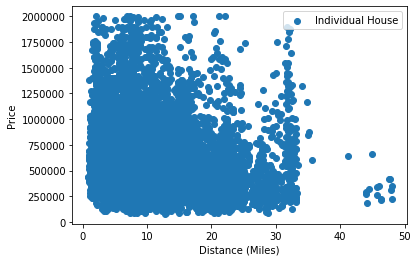

In [183]:
plt.scatter(house_distance['distance'],house_distance['price'],label='Individual House')
plt.xlabel('Distance (Miles)')
plt.ticklabel_format(style='plain')
plt.ylabel('Price')
plt.legend()
plt.show()

## 4. Check Normality for Variables

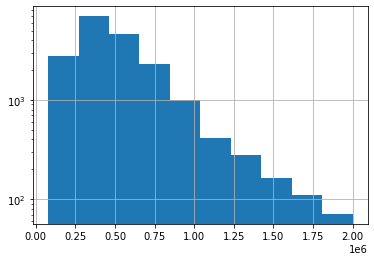

In [184]:
house_distance['price'].hist().set_yscale('log')

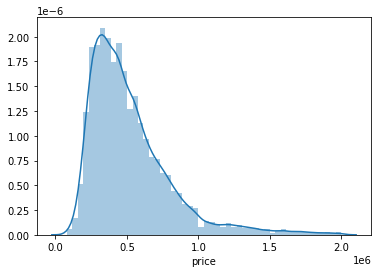

In [185]:
sns.distplot(house_distance['price']);

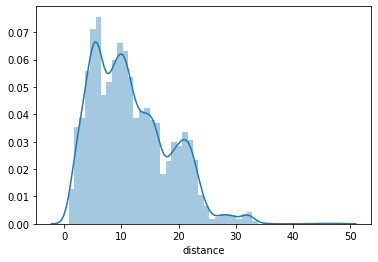

In [186]:
sns.distplot(house_distance['distance']);

## Correlation

Text(0.5, 1.0, 'SCatter Plot with Linear Fit between Price and Distance to Dowtown Seattle')

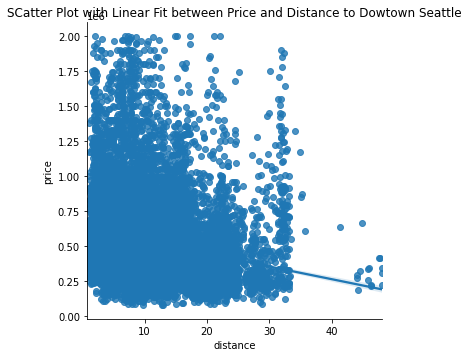

In [187]:
sns.lmplot(x='distance',y='price',data=house_distance)
plt.title('SCatter Plot with Linear Fit between Price and Distance to Dowtown Seattle')

In [190]:
from scipy.stats import pearsonr
corr, _ = pearsonr(house_distance['distance'],house_distance['price'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.211


## 5. Simple Linear Regression

In [116]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [117]:
f = 'price~distance'

model = ols(formula=f,data=house_distance).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     2046.
Date:                Fri, 24 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:40:17   Log-Likelihood:            -2.6347e+05
No. Observations:               18904   AIC:                         5.269e+05
Df Residuals:                   18902   BIC:                         5.270e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    6.77e+05   3980.140    170.096      0.000    6.69e+05    6.85e+05
distance   -1.345e+04    297.300    -45.232      0.000    -1.4e+04   -1.29e+04
==============================================================================
Omnibus:                     6590.430   Durbin-Watson:                   1.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24474.679
Skew:                           1.738   Prob(JB):                         0.00
Kurtosis:                       7.358   Cond. No.                         26.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

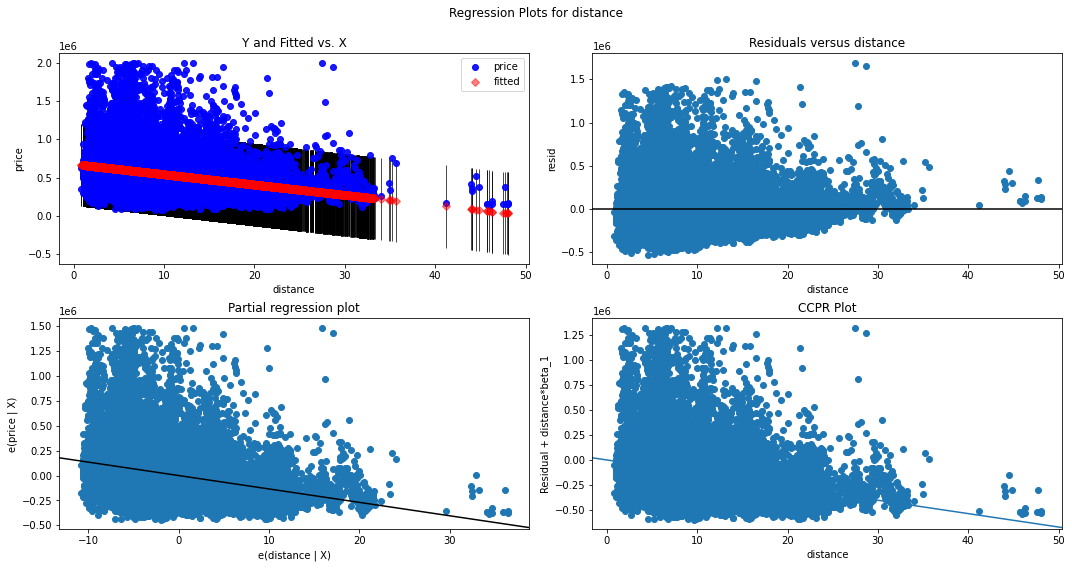

In [118]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'distance',fig=fig)
plt.show()

## 6. Normality Check

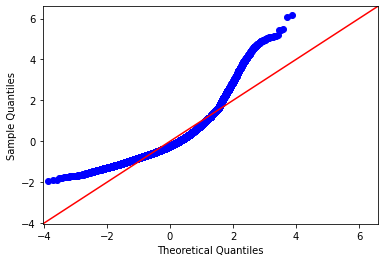

In [119]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)
fig.show()

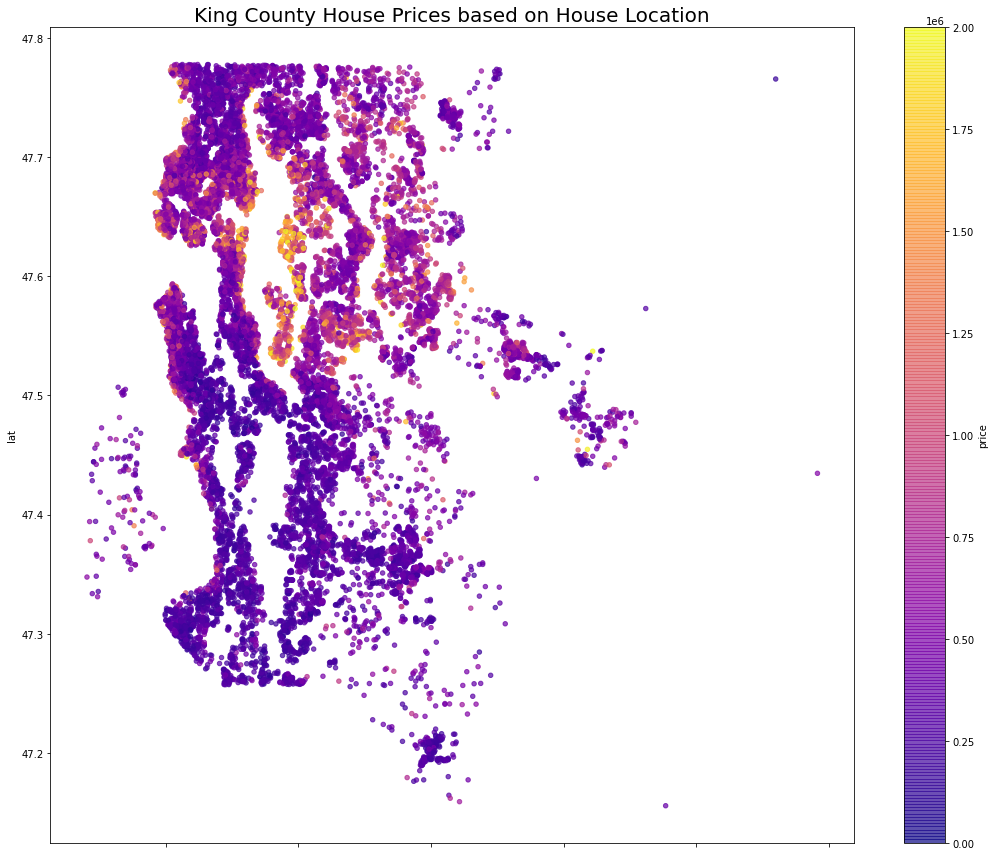

In [193]:
ax = house_distance.plot.scatter('long','lat',c='price',alpha=0.7,figsize=(18,15),vmin = 0, vmax=2000000,
                                 cmap='plasma')
plt.title('King County House Prices based on House Location',fontsize=20)
plt.savefig('images/EDA_1.png')
plt.show();

# Interpretation

* There is no relationship between price and distance between the home and downtown seattle.
* Normality for each variables are very skewed.
* Normality for the residuals is very curved and distorted meaning the residuals hae a non-normal distribiution.
* Low R-squared in which there is no good fit.
* There is heteroscedasticity in the data indicating variability is unequal across the distance values.

A lot more preprocessing can be done and this can definitely be explored more. After a quick model, this was definitely not a good model with an R-squared of 0.098.